<a href="https://colab.research.google.com/github/nitesis/CAS_AICP_M6_Exercises/blob/main/Session_1_Text_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of Text Processing
1. Tokenization: Char, Word and Sentence tokenizations and example of Zipf's law.
2. Stemming and Lemmatization
3. POS tagging
4. Ngrams
5. Regex



### Tokenization

**NLTK** is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.
https://www.nltk.org/

In [1]:
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag

In [2]:
nltk.download('gutenberg')  # Sample text corpus from Project Gutenberg
nltk.download('punkt')      # Tokenizer
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
# Load own text from the same folder as the code here
with open('sample.txt', 'r') as file:
    text = file.read()

In [3]:
# Load a sample text corpus (e.g., 'Moby Dick')
from nltk.corpus import gutenberg
text = gutenberg.raw('melville-moby_dick.txt')

In [4]:
print(text[0:100])

[Moby Dick by Herman Melville 1851]


ETYMOLOGY.

(Supplied by a Late Consumptive Usher to a Gr


In [5]:
sentence_tokens = sent_tokenize(text.lower()) # The function lower helps to make characters lowercase
print(sentence_tokens[0:10])

['[moby dick by herman melville 1851]\r\n\r\n\r\netymology.', '(supplied by a late consumptive usher to a grammar school)\r\n\r\nthe pale usher--threadbare in coat, heart, body, and brain; i see him\r\nnow.', 'he was ever dusting his old lexicons and grammars, with a queer\r\nhandkerchief, mockingly embellished with all the gay flags of all the\r\nknown nations of the world.', 'he loved to dust his old grammars; it\r\nsomehow mildly reminded him of his mortality.', '"while you take in hand to school others, and to teach them by what\r\nname a whale-fish is to be called in our tongue leaving out, through\r\nignorance, the letter h, which almost alone maketh the signification\r\nof the word, you deliver that which is not true."', '--hackluyt\r\n\r\n"whale.', '... sw. and dan.', 'hval.', 'this animal is named from roundness\r\nor rolling; for in dan.', 'hvalt is arched or vaulted."']


In [6]:
char_tokens = list(text.lower())
print(char_tokens[0:10])

['[', 'm', 'o', 'b', 'y', ' ', 'd', 'i', 'c', 'k']


In [7]:
# Tokenize the text into words
tokens = nltk.word_tokenize(text.lower())
print(tokens[0:10])

['[', 'moby', 'dick', 'by', 'herman', 'melville', '1851', ']', 'etymology', '.']


In [9]:
# Calculate word frequencies
fdist = FreqDist(tokens)

In [10]:
fdist

FreqDist({',': 19204, 'the': 14422, '.': 7284, 'of': 6586, 'and': 6414, 'a': 4698, 'to': 4597, ';': 4173, 'in': 4163, 'that': 3084, ...})

In [14]:
# Get frequencies sorted in descending order
frequencies = list(fdist.values())
frequencies.sort(reverse=True)
frequencies[:100] # Show the first 100 words

[19204,
 14422,
 7284,
 6586,
 6414,
 4698,
 4597,
 4173,
 4163,
 3084,
 2530,
 2518,
 2109,
 1895,
 1813,
 1787,
 1767,
 1748,
 1741,
 1722,
 1713,
 1652,
 1616,
 1615,
 1508,
 1456,
 1393,
 1318,
 1218,
 1201,
 1095,
 1088,
 1067,
 1060,
 1059,
 1042,
 1004,
 913,
 892,
 866,
 784,
 779,
 771,
 713,
 683,
 667,
 648,
 630,
 627,
 620,
 618,
 606,
 605,
 597,
 596,
 588,
 583,
 580,
 565,
 527,
 522,
 514,
 511,
 507,
 498,
 481,
 474,
 469,
 458,
 443,
 438,
 436,
 425,
 415,
 415,
 403,
 403,
 387,
 384,
 383,
 376,
 376,
 370,
 367,
 359,
 344,
 332,
 327,
 326,
 325,
 323,
 320,
 318,
 312,
 310,
 309,
 306,
 304,
 303,
 299]

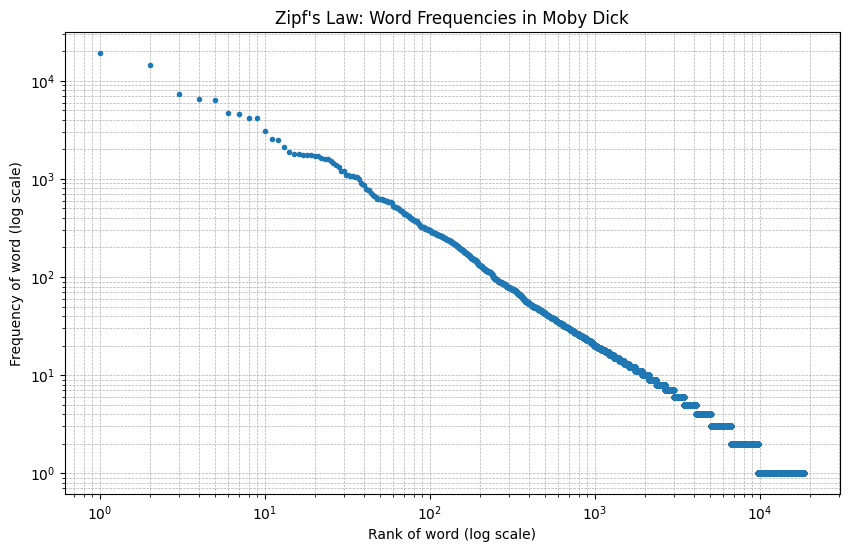

In [16]:
# Plot Zipf's Law (log scale)
plt.figure(figsize=(10, 6))
plt.loglog(range(1, len(frequencies) + 1), frequencies, marker=".", linestyle="none")
plt.title("Zipf's Law: Word Frequencies in Moby Dick")
plt.xlabel("Rank of word (log scale)")
plt.ylabel("Frequency of word (log scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

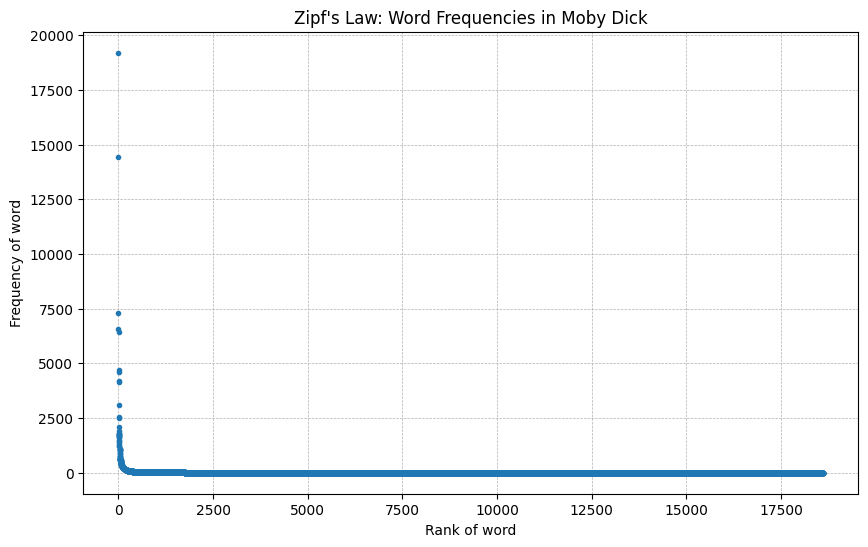

In [17]:

# Plot Zipf's Law
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(frequencies) + 1), frequencies, marker=".", linestyle="none")
plt.title("Zipf's Law: Word Frequencies in Moby Dick")
plt.xlabel("Rank of word")
plt.ylabel("Frequency of word")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

### Stemming and Lemmatization

In [18]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()
print(porter.stem("go"))
print(porter.stem("going"))
print(porter.stem("goes"))
print(porter.stem("went"))


go
go
goe
went


In [19]:
for word in tokens[1:20]:
  print(word, porter.stem(word))

moby mobi
dick dick
by by
herman herman
melville melvil
1851 1851
] ]
etymology etymolog
. .
( (
supplied suppli
by by
a a
late late
consumptive consumpt
usher usher
to to
a a
grammar grammar


In [20]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("go", 'v')) #In lemmatizers, we need to pass the Part of Speech of the word (here verb) along with the word as a function argument.
print(lemmatizer.lemmatize("going", 'v'))
print(lemmatizer.lemmatize("goes", 'v'))
print(lemmatizer.lemmatize("went", 'v'))

go
go
go
go


### Parts of Speech
The list of all possible tags from the official site are [here](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).

In [23]:
#With NLTK
tags = pos_tag(tokens[0:20])
tags

[('[', 'JJ'),
 ('moby', 'NN'),
 ('dick', 'NN'),
 ('by', 'IN'),
 ('herman', 'NN'),
 ('melville', 'NN'),
 ('1851', 'CD'),
 (']', 'NNP'),
 ('etymology', 'NN'),
 ('.', '.'),
 ('(', '('),
 ('supplied', 'VBN'),
 ('by', 'IN'),
 ('a', 'DT'),
 ('late', 'JJ'),
 ('consumptive', 'NN'),
 ('usher', 'NN'),
 ('to', 'TO'),
 ('a', 'DT'),
 ('grammar', 'NN')]

In [ ]:
# With Spacy
!pip install spacy
!python -m spacy download en_core_web_sm


In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Input sentence
sentence = "a happy dog is on the train"

# Process the sentence using spaCy
doc = nlp(sentence)

# Print each word with its corresponding POS tag
print("Word\tPOS\t\tExplanation")
print("-" * 30)
for token in doc:
    print(f"{token.text}\t{token.pos_}\t\t{spacy.explain(token.pos_)}")

Word	POS		Explanation
------------------------------
a	DET		determiner
happy	ADJ		adjective
dog	NOUN		noun
is	AUX		auxiliary
on	ADP		adposition
the	DET		determiner
train	NOUN		noun


In [ ]:
displacy.serve(doc, style="dep")

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


### NGrams

In [ ]:
from collections import Counter

# Function to generate n-grams for words
def word_ngrams(token_list, n):
    return [' '.join([token for token in token_list[i:i+n]]) for i in range(len(token_list) - n + 1)]

# Function to generate n-grams for characters
def char_ngrams(token_list, n):
    text = "".join(token_list)
    return [text[i:i+n] for i in range(len(text) - n + 1)]

# Count word n-grams (e.g., bigrams and trigrams)
word_bigrams = word_ngrams(tokens[0:10], 2)
word_trigrams = word_ngrams(tokens[0:10], 3)

# Count character n-grams (e.g., 2-grams and 3-grams)
char_bigrams = char_ngrams(tokens[0:10], 2)
char_trigrams = char_ngrams(tokens[0:10], 3)

# Display results
print("Word Bigrams:", Counter(word_bigrams))
print("Word Trigrams:", Counter(word_trigrams))
print("Character Bigrams:", Counter(char_bigrams))
print("Character Trigrams:", Counter(char_trigrams))

Word Bigrams: Counter({'[ moby': 1, 'moby dick': 1, 'dick by': 1, 'by herman': 1, 'herman melville': 1, 'melville 1851': 1, '1851 ]': 1, '] etymology': 1, 'etymology .': 1})
Word Trigrams: Counter({'[ moby dick': 1, 'moby dick by': 1, 'dick by herman': 1, 'by herman melville': 1, 'herman melville 1851': 1, 'melville 1851 ]': 1, '1851 ] etymology': 1, '] etymology .': 1})
Character Bigrams: Counter({'mo': 2, 'by': 2, '[m': 1, 'ob': 1, 'yd': 1, 'di': 1, 'ic': 1, 'ck': 1, 'kb': 1, 'yh': 1, 'he': 1, 'er': 1, 'rm': 1, 'ma': 1, 'an': 1, 'nm': 1, 'me': 1, 'el': 1, 'lv': 1, 'vi': 1, 'il': 1, 'll': 1, 'le': 1, 'e1': 1, '18': 1, '85': 1, '51': 1, '1]': 1, ']e': 1, 'et': 1, 'ty': 1, 'ym': 1, 'ol': 1, 'lo': 1, 'og': 1, 'gy': 1, 'y.': 1})
Character Trigrams: Counter({'[mo': 1, 'mob': 1, 'oby': 1, 'byd': 1, 'ydi': 1, 'dic': 1, 'ick': 1, 'ckb': 1, 'kby': 1, 'byh': 1, 'yhe': 1, 'her': 1, 'erm': 1, 'rma': 1, 'man': 1, 'anm': 1, 'nme': 1, 'mel': 1, 'elv': 1, 'lvi': 1, 'vil': 1, 'ill': 1, 'lle': 1, 'le1'

## Todo

Write a function to return all unique matching words and word variations when given a stemm word and a list of tokens


In [ ]:
def find_mentions(word, tokens):
  matching_words =
  #
  #
  #
  return matching_words

In [ ]:
find_mentions("whale", tokens[0:20000])

{'whale', 'whales', 'whaling'}

### Regex
1. Use re.match() to find a match at the start of a string
2. Use re.search() to find the first occurrence of a pattern anywhere in a string.
3. Use re.findall() to get all occurrences of a pattern.
4. Use re.sub() to replace matches with a string.
5. Common Patterns


| Pattern     | Matches                          |
|-------------|----------------------------------|
| `\d`        | Any digit (`0-9`)               |
| `\w`        | Any word character (`a-z`, `A-Z`, `0-9`, `_`) |
| `.`         | Any character except newline    |
| `*`         | 0 or more repetitions           |
| `+`         | 1 or more repetitions           |
| `?`         | 0 or 1 repetition               |
| `[abc]`     | Any character in `a`, `b`, `c`  |
| `[^abc]`    | Any character not in `a`, `b`, `c` |
| `[a-z]`     | Any lowercase letter            |
| `[A-Z]`     | Any uppercase letter            |
| `[0-9]`     | Any digit                       |
| `^`         | Start of a string               |
| `$`         | End of a string                 |
| `\s`        | Any whitespace character        |
| `\S`        | Any non-whitespace character    |
| `\b`        | Word boundary                   |
| `\B`        | Non-word boundary               |
| `|`         | Logical OR                      |
| `( )`       | Capturing group                 |
| `(?: )`     | Non-capturing group             |
| `\`         | Escape special characters       |



In [ ]:
import re

## Todo

Write a function to return all unique matching words and word variations when given a word and a list of tokens **using regex**


In [ ]:
def find_mentions(word, tokens):
  matching_word_set =
  #
  #
  #
  return matching_word_set

In [ ]:
find_mentions("whale", tokens[0:20000])

{'horse-whales',
 'jonas-in-the-whale',
 'whale',
 'whale-bone',
 'whale-fish',
 'whale-fishery',
 'whale-lance',
 'whale-ship',
 'whaleman',
 'whalemen',
 'whales'}